#Görüntü Kenetleme (Image Clamping)

Çalışmada giriş olarak 8-bit gri tonlamalı bir görüntü kullanılmıştır.

Görüntü kenetleme işlemi için alt eşik değeri a = 50, üst eşik değeri ise b = 200 olarak belirlenmiştir.

Alt eşik değerinin altında kalan tüm piksel yoğunlukları 50’ye, üst eşik değerinin üzerinde kalan tüm piksel yoğunlukları ise 200’e sabitlenmiştir.

Belirlenen aralık içinde kalan piksel değerleri ise değiştirilmeden korunmuştur.

Kenetleme işlemi, NumPy kütüphanesinin clip() fonksiyonu kullanılarak gerçekleştirilmiştir.

Sonuç görüntü, orijinal görüntü ile karşılaştırmalı olarak görselleştirilmiştir.

Bu çalışmada uygulanan kenetleme (clamping) işlemi aşağıdaki fonksiyon ile
ifade edilebilir:

$$
s = f(r) =
\begin{cases}
a, & r < a \\
r, & a \leq r \leq b \\
b, & r > b
\end{cases}
$$

Burada:

- $r$ giriş piksel değerini,
- $s$ çıkış piksel değerini,
- $a$ alt eşik değerini,
- $b$ üst eşik değerini temsil etmektedir.


Görüntü kenetleme işlemi ile belirlenen yoğunluk aralığı dışındaki aşırı karanlık ve aşırı parlak piksel değerleri sınırlandırılmıştır. Bu işlem sonucunda, görüntünün dinamik aralığı daraltılmış ve yoğunluk dağılımı daha dengeli hale getirilmiştir. Kenetleme, özellikle aykırı yoğunluk değerlerinin baskılanması ve görüntü kontrastının kontrol edilmesi açısından etkili bir ön işleme yöntemi olarak değerlendirilmektedir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


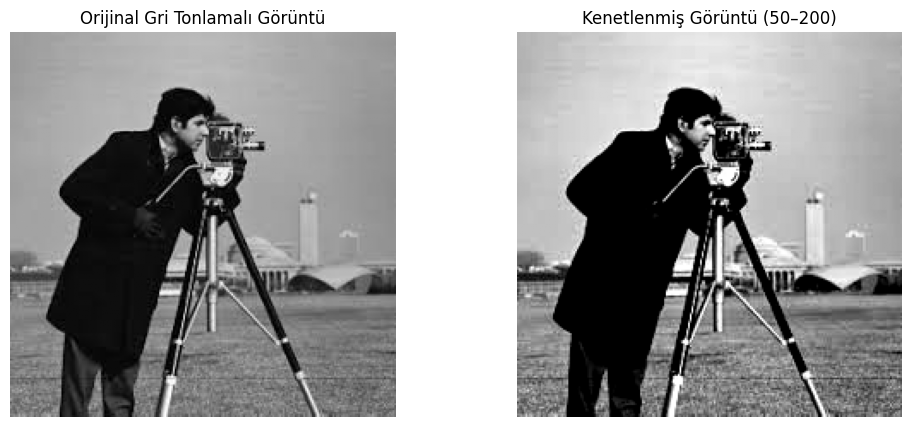

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 8-bit gri tonlamalı görüntünün okunması
image_path = "/content/drive/MyDrive/Colab Notebooks/islem/cameraman_test_image_grayscale.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntünün doğru okunup okunmadığını kontrol et
if image is None:
    raise ValueError("Görüntü yüklenemedi. Dosya yolunu kontrol ediniz.")

# 2. Kenetleme (clamping) için alt ve üst eşik değerlerinin belirlenmesi
a = 50    # alt eşik
b = 200   # üst eşik

# Kenetleme işlemi
# Piksel değerleri [a, b] aralığına zorla sınırlandırılır
clamped_image = np.clip(image, a, b)

# 3. Sonuçların görselleştirilmesi
plt.figure(figsize=(12, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Orijinal Gri Tonlamalı Görüntü")
plt.axis("off")

# Kenetlenmiş görüntü
plt.subplot(1, 2, 2)
plt.imshow(clamped_image, cmap='gray')
plt.title("Kenetlenmiş Görüntü (50–200)")
plt.axis("off")

plt.show()
